# Segmentation RFM & Clustering

## Domaine: Marketing

## Chargement des données

In [ ]:
# Importation de bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Chargement des données
df = pd.read_csv("marketing_campaign.csv", sep=";")

## Vérification et traitement des données

In [ ]:
#Afficher les premières lignes
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Information sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Convertir 'Dt_Customer' en format datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

# Vérifier la conversion
df["Dt_Customer"].head()


,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


In [ ]:
# Analyse des données manquantes
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Traitement des données manquantes
# Imputation des valeurs manquantes par la médiane
df['Income'].fillna(df['Income'].median(), inplace=True)

<ipython-input-8-e1b616c859b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
# Vérification des valeurs manqauntes
df['Income'].isnull().sum()

0

In [ ]:
# Vérification des doblons
duplicates = df.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")

Nombre de lignes dupliquées : 0


### Création de variables suplémentaires

In [ ]:
# Création d'une variable indiquant le nombre total de campagnes acceptées
campagne_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['TotalAcceptedCampaigns'] = df[campagne_cols].sum(axis=1)

# Création d'une variable "TotalPurchases" qui correspond au nombre total d'achats
achat_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[achat_cols].sum(axis=1)

# Création d'une variable "TotalAmountSpent" qui correspond au montant total dépensé sur les différents produits
depense_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalAmountSpent'] = df[depense_cols].sum(axis=1)

# Afficher un aperçu des nouvelles colonnes
print(df[['TotalAcceptedCampaigns', 'TotalPurchases', 'TotalAmountSpent']].head())


   TotalAcceptedCampaigns  TotalPurchases  TotalAmountSpent
0                       0              25              1617
1                       0               6                27
2                       0              21               776
3                       0               8                53
4                       0              19               422


## Segmentation RFM
La segmentation RFM est une technique d'analyse qui permet de classer les clients en fonction de trois critères principaux:
* **Récence (Recency)**: Le temps écoulé depuis le dernier achat du client.
* **Montant (Monetary)**: Le montant total dépensé par le client.
* **Fréquence (Frequency)**: Le nombre d'achats effectués par le client sur une période donnée.

### Préparation des données RFM

In [ ]:
# Les variables RFM:
# Récence: df['Recency']
# Fréquence: df['TotalPurchases']
# Montant: df['TotalAmountSpent']

# Créer un DataFrame RFM
rfm = df[['Recency', 'TotalPurchases', 'TotalAmountSpent']].copy()

# Statistiques descriptives RFM
print(rfm.describe())


           Recency  TotalPurchases  TotalAmountSpent
count  2240.000000     2240.000000       2240.000000
mean     49.109375       14.862054        605.798214
std      28.962453        7.677173        602.249288
min       0.000000        0.000000          5.000000
25%      24.000000        8.000000         68.750000
50%      49.000000       15.000000        396.000000
75%      74.000000       21.000000       1045.500000
max      99.000000       44.000000       2525.000000


### Normalisation des données RFM

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Vérifier la transformation
print(pd.DataFrame(rfm_scaled, columns=rfm.columns).head())


    Recency  TotalPurchases  TotalAmountSpent
0  0.307039        1.320826          1.679417
1 -0.383664       -1.154596         -0.961275
2 -0.798086        0.799685          0.282673
3 -0.798086       -0.894025         -0.918094
4  1.550305        0.539114         -0.305254


### Application du clustering avec K-Means (Apprentissage non suppervisé)

#### Nombre optimal de clusters

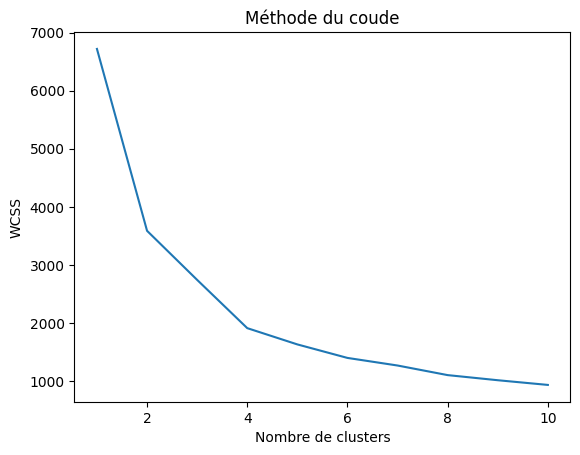

In [ ]:
from sklearn.cluster import KMeans

# Déterminer le nombre optimal de clusters (méthode du coude)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Appliquer K-Means avec le nombre optimal de clusters (4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Afficher les centres des clusters
print(kmeans.cluster_centers_)


[[-0.84476001 -0.81555299 -0.79537779]
 [ 0.807027    0.87380046  0.91671158]
 [-0.91812381  0.90764288  0.84441976]
 [ 0.89151275 -0.76756513 -0.77594997]]


## Visualisation des clusters

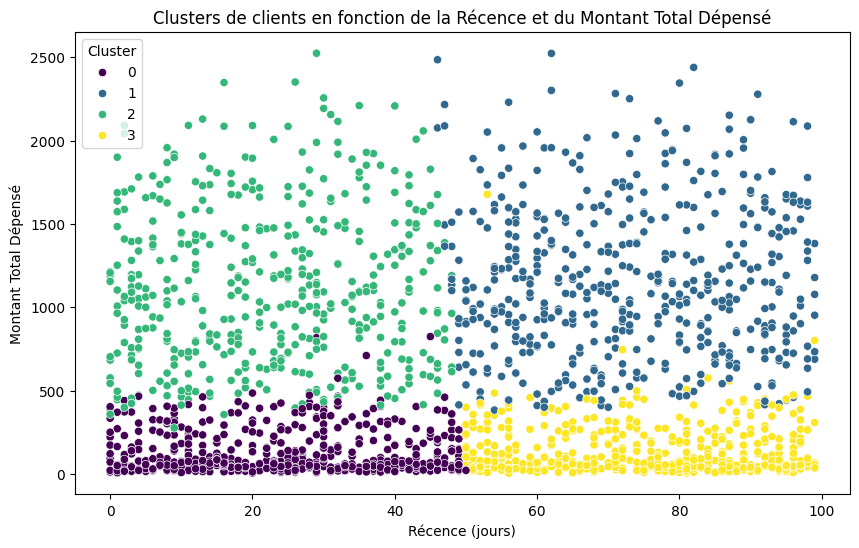

In [ ]:
# Visualiser les clusters avec recence et montant total dépensé
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalAmountSpent', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de clients en fonction de la Récence et du Montant Total Dépensé')
plt.xlabel('Récence (jours)')
plt.ylabel('Montant Total Dépensé')
plt.show()


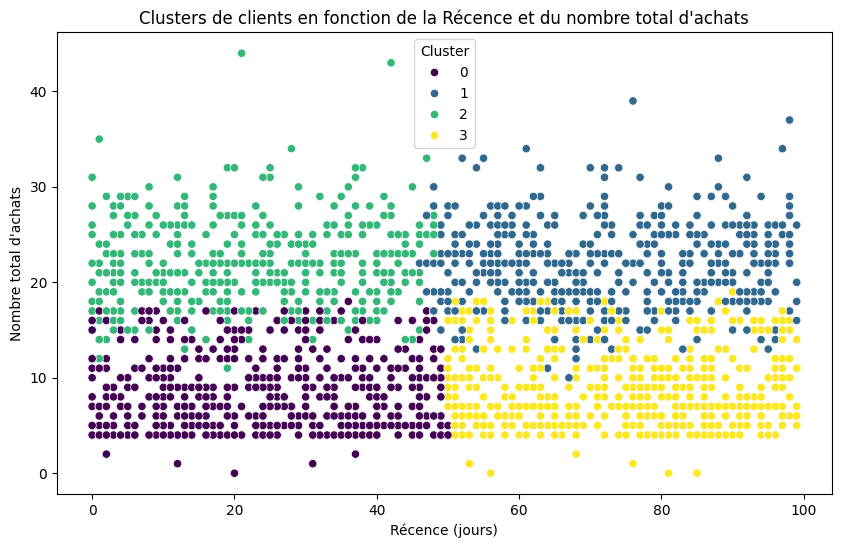

In [ ]:
# Visualiser les clusters avec recence et le total des achats (TotalPurchases)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalPurchases', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters de clients en fonction de la Récence et du nombre total d\'achats')
plt.xlabel('Récence (jours)')
plt.ylabel('Nombre total d\'achats')
plt.show()


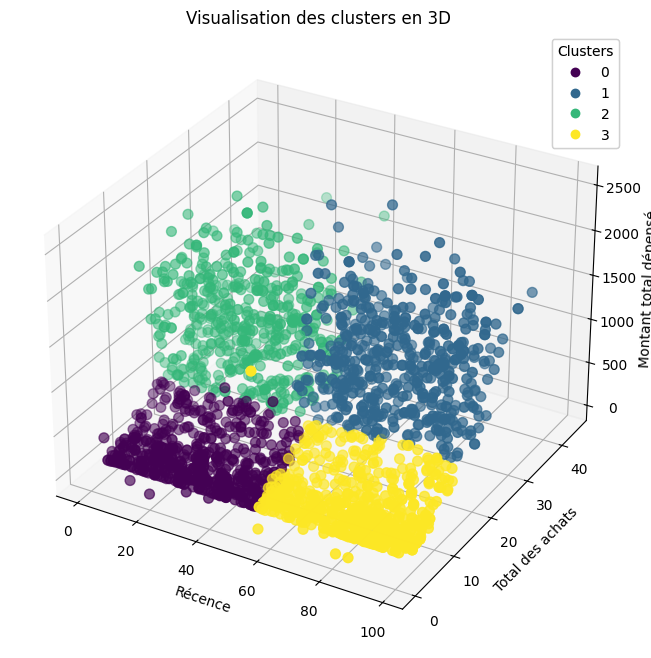

In [ ]:
# Visualisation des clusters en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recency'], df['TotalPurchases'], df['TotalAmountSpent'], c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Récence')
ax.set_ylabel('Total des achats')
ax.set_zlabel('Montant total dépensé')
ax.set_title('Visualisation des clusters en 3D')

# Ajouter une légende
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()
